In [ ]:
!pip install scikit-plot

In [ ]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.3 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import random_projection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.linear_model import LogisticRegression

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist
from pyts.metrics import dtw as dtw2

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Loading Training Sets

In [ ]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# add subject column to the dataframe
#X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = X_train
#train['Activity'] = y_train

In [ ]:
body_acc_x_train = pd.read_csv('body_acc_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_acc_y_train = pd.read_csv('body_acc_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_acc_z_train = pd.read_csv('body_acc_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_gyro_x_train = pd.read_csv('body_gyro_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)
#y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = body_gyro_x_train
#train['Activity'] = y_train
#train['ActivityName'] = y_train_labels

In [ ]:
body_gyro_y_train = pd.read_csv('body_gyro_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_gyro_z_train = pd.read_csv('body_gyro_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
total_acc_x_train = pd.read_csv('total_acc_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
total_acc_y_train = pd.read_csv('total_acc_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
total_acc_z_train = pd.read_csv('total_acc_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

# Loading Test Sets

In [ ]:
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features

# add subject column to the dataframe
#X_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)
#y_test_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train01 = X_test
#train01['Activity'] = y_test

In [ ]:
body_acc_x_test = pd.read_csv('body_acc_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_acc_y_test = pd.read_csv('body_acc_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_acc_z_test = pd.read_csv('body_acc_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_gyro_x_test = pd.read_csv('body_gyro_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_gyro_y_test = pd.read_csv('body_gyro_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
body_gyro_z_test = pd.read_csv('body_gyro_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
total_acc_x_test = pd.read_csv('total_acc_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
total_acc_y_test = pd.read_csv('total_acc_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
total_acc_z_test = pd.read_csv('total_acc_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [ ]:
#dataset con varianza più alta
body_acc_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.003374,-0.002858,-0.001708,-0.000536,0.000333,0.000480,-0.000289,-0.001002,-0.000909,-0.000574,...,-0.000798,0.000131,0.000343,0.000431,0.000650,0.000752,0.001230,0.000948,0.000916,0.001978
std,0.198317,0.197407,0.197976,0.196811,0.195771,0.196652,0.195381,0.194239,0.193354,0.196055,...,0.191265,0.191452,0.191714,0.193405,0.194176,0.194513,0.195691,0.196523,0.197047,0.199408
min,-0.857863,-0.897771,-0.975056,-0.984342,-0.886248,-0.830093,-0.835363,-0.879751,-0.955099,-1.027935,...,-1.038524,-0.756240,-1.019879,-0.828062,-0.864435,-0.746925,-0.897870,-0.865697,-0.750321,-0.795426
25%,-0.038449,-0.037463,-0.036089,-0.033924,-0.033026,-0.035838,-0.034997,-0.032398,-0.034113,-0.033094,...,-0.022469,-0.023967,-0.022285,-0.021040,-0.023009,-0.023871,-0.024126,-0.022968,-0.024064,-0.023289
50%,-0.000718,-0.000747,-0.000624,-0.000658,-0.000719,-0.000827,-0.000762,-0.000831,-0.000746,-0.000697,...,-0.000596,-0.000646,-0.000608,-0.000477,-0.000545,-0.000575,-0.000617,-0.000460,-0.000694,-0.000622
75%,0.008661,0.008745,0.008930,0.008600,0.008426,0.008191,0.008751,0.008574,0.008221,0.008555,...,0.006514,0.006619,0.006823,0.006992,0.006615,0.006518,0.006584,0.007144,0.006665,0.006828
max,1.133144,1.091050,1.097443,1.046354,1.107588,1.057651,1.238608,1.049933,1.101743,1.056121,...,1.127268,1.132387,1.156435,1.133764,1.089165,1.128485,1.082167,1.180790,1.155468,1.087837


In [ ]:
std_baccx = body_acc_x_train.std()
std_baccy = body_acc_y_train.std()
std_baccz = body_acc_z_train.std()
std_bgyrox = body_gyro_x_train.std()
std_bgyroy = body_gyro_y_train.std()
std_bgyroz = body_gyro_z_train.std()
std_totaccx = total_acc_x_train.std()
std_totaccy = total_acc_y_train.std()
std_totaccz = total_acc_z_train.std()

In [ ]:
print('bacc_x', std_baccx.mean())
print('bacc_y', std_baccy.mean())
print('bacc_z', std_baccz.mean())
print('bgyro_x', std_bgyrox.mean())
print('bgyro_y', std_bgyroy.mean())
print('bgyro_z', std_bgyroz.mean())
print('totacc_x', std_totaccx.mean())
print('totacc_y', std_totaccy.mean())
print('totacc_z', std_totaccz.mean())

bacc_x 0.19482892669749152
bacc_y 0.12240050717841242
bacc_z 0.10680715788956446
bgyro_x 0.4067296422795279
bgyro_y 0.38175873417057304
bgyro_z 0.25570864936282
totacc_x 0.41413047027078664
totacc_y 0.3910152844312498
totacc_z 0.35778355912457643


In [ ]:
min_baccx = body_acc_x_train.min()
min_baccy = body_acc_y_train.min()
min_baccz = body_acc_z_train.min()
min_bgyrox = body_gyro_x_train.min()
min_bgyroy = body_gyro_y_train.min()
min_bgyroz = body_gyro_z_train.min()
min_totaccx = total_acc_x_train.min()
min_totaccy = total_acc_y_train.min()
min_totaccz = total_acc_z_train.min()

In [ ]:
print(min_baccx.min())
print(min_baccy.min())
print(min_baccz.min())
print(min_bgyrox.min())
print(min_bgyroy.min())
print(min_bgyroz.min())
print(min_totaccx.min())
print(min_totaccy.min())
print(min_totaccz.min())

-1.232238
-1.345267
-1.364707
-4.733656
-5.97433
-2.763014
-0.4665558
-1.582079
-1.639609


In [ ]:
max_baccx = body_acc_x_train.max()
max_baccy = body_acc_y_train.max()
max_baccz = body_acc_z_train.max()
max_bgyrox = body_gyro_x_train.max()
max_bgyroy = body_gyro_y_train.max()
max_bgyroz = body_gyro_z_train.max()
max_totaccx = total_acc_x_train.max()
max_totaccy = total_acc_y_train.max()
max_totaccz = total_acc_z_train.max()

In [ ]:
print(max_baccx.max())
print(max_baccy.max())
print(max_baccz.max())
print(max_bgyrox.max())
print(max_bgyroy.max())
print(max_bgyroz.max())
print(max_totaccx.max())
print(max_totaccy.max())
print(max_totaccz.max())

1.299912
0.9759764
1.066916
4.155473
5.746062
2.365982
2.197618
1.21735
1.281363


In [ ]:
print('bgyro_x', std_bgyrox.var())
print('totacc_x', std_totaccx.var())
print('totacc_y', std_totaccy.var())

bgyro_x 7.779602430478292e-05
totacc_x 3.244924674966347e-06
totacc_y 1.9207174505528415e-06


In [ ]:
for i in range(len(total_acc_x_train)):
    if body_gyro_x_train.iloc[i][127] > 4 or body_gyro_x_train.iloc[i][127] < -3.3:
        print(body_gyro_x_train.iloc[i][127])
        print('row:', i)
        print('----------------')

-3.395589
row: 3750
----------------
4.077152
row: 3915
----------------
-3.658334
row: 4871
----------------


## Data preparation

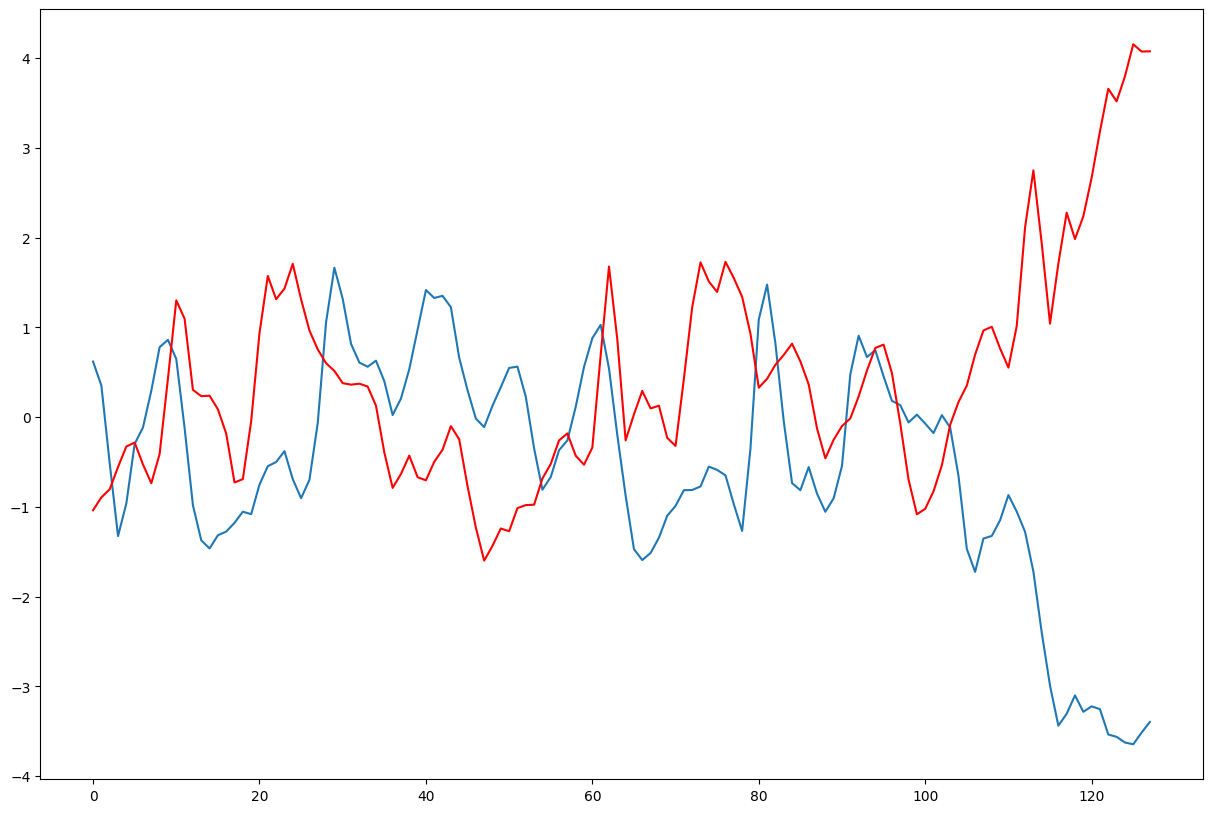

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3750])
plt.plot(body_gyro_x_train.T[3915], color='red')
plt.show()

KeyError: ignored

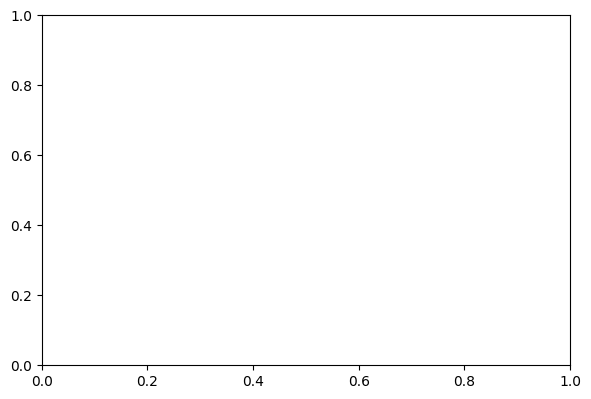

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(body_acc_x_train[50].ravel(), "b-")
plt.title("Raw time series")

In [ ]:
body_acc_x_train.shape

(7352, 128)

In [ ]:
body_acc_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.003374,-0.002858,-0.001708,-0.000536,0.000333,0.000480,-0.000289,-0.001002,-0.000909,-0.000574,...,-0.000798,0.000131,0.000343,0.000431,0.000650,0.000752,0.001230,0.000948,0.000916,0.001978
std,0.198317,0.197407,0.197976,0.196811,0.195771,0.196652,0.195381,0.194239,0.193354,0.196055,...,0.191265,0.191452,0.191714,0.193405,0.194176,0.194513,0.195691,0.196523,0.197047,0.199408
min,-0.857863,-0.897771,-0.975056,-0.984342,-0.886248,-0.830093,-0.835363,-0.879751,-0.955099,-1.027935,...,-1.038524,-0.756240,-1.019879,-0.828062,-0.864435,-0.746925,-0.897870,-0.865697,-0.750321,-0.795426
25%,-0.038449,-0.037463,-0.036089,-0.033924,-0.033026,-0.035838,-0.034997,-0.032398,-0.034113,-0.033094,...,-0.022469,-0.023967,-0.022285,-0.021040,-0.023009,-0.023871,-0.024126,-0.022968,-0.024064,-0.023289
50%,-0.000718,-0.000747,-0.000624,-0.000658,-0.000719,-0.000827,-0.000762,-0.000831,-0.000746,-0.000697,...,-0.000596,-0.000646,-0.000608,-0.000477,-0.000545,-0.000575,-0.000617,-0.000460,-0.000694,-0.000622
75%,0.008661,0.008745,0.008930,0.008600,0.008426,0.008191,0.008751,0.008574,0.008221,0.008555,...,0.006514,0.006619,0.006823,0.006992,0.006615,0.006518,0.006584,0.007144,0.006665,0.006828
max,1.133144,1.091050,1.097443,1.046354,1.107588,1.057651,1.238608,1.049933,1.101743,1.056121,...,1.127268,1.132387,1.156435,1.133764,1.089165,1.128485,1.082167,1.180790,1.155468,1.087837


## Shapelets

In [ ]:
#from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

NameError: ignored

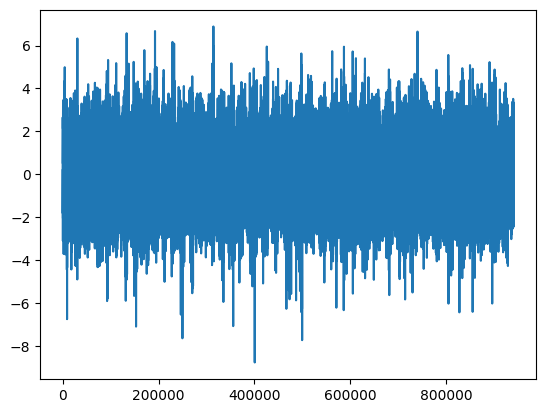

In [ ]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(body_gyro_x_train.values).flatten()
#ts2_scaled = scaler.fit_transform(body_gyro_x_train.T[3914].values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

In [ ]:
ts1_scaled=pd.DataFrame(ts1_scaled)

In [ ]:
ts1_scaled

In [ ]:
n_ts, ts_sz = body_gyro_x_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 7352
ts_sz 128
n_classes 6
shapelet_sizes {12: 6}


In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=50,
                        verbose=1)

In [ ]:
shp_clf.fit(body_gyro_x_train, y_train)

Epoch 1/50
29/29 [==============================] - 2s 14ms/step - loss: 1.7602 - categorical_accuracy: 0.1874 - categorical_crossentropy: 1.6992
Epoch 2/50
29/29 [==============================] - 0s 13ms/step - loss: 1.7528 - categorical_accuracy: 0.1876 - categorical_crossentropy: 1.6925
Epoch 3/50
29/29 [==============================] - 0s 13ms/step - loss: 1.7462 - categorical_accuracy: 0.1892 - categorical_crossentropy: 1.6864
Epoch 4/50
29/29 [==============================] - 1s 20ms/step - loss: 1.7402 - categorical_accuracy: 0.1916 - categorical_crossentropy: 1.6809
Epoch 5/50
29/29 [==============================] - 1s 21ms/step - loss: 1.7347 - categorical_accuracy: 0.1944 - categorical_crossentropy: 1.6758
Epoch 6/50
29/29 [==============================] - 1s 21ms/step - loss: 1.7297 - categorical_accuracy: 0.1983 - categorical_crossentropy: 1.6712
Epoch 7/50
29/29 [==============================] - 1s 22ms/step - loss: 1.7249 - categorical_accuracy: 0.2025 - categorical

LearningShapelets(max_iter=50, n_shapelets_per_size={12: 6}, verbose=1,
                  weight_regularizer=0.01)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predicted_locations = shp_clf.locate(body_gyro_x_train)

29/29 [==============================] - 1s 11ms/step


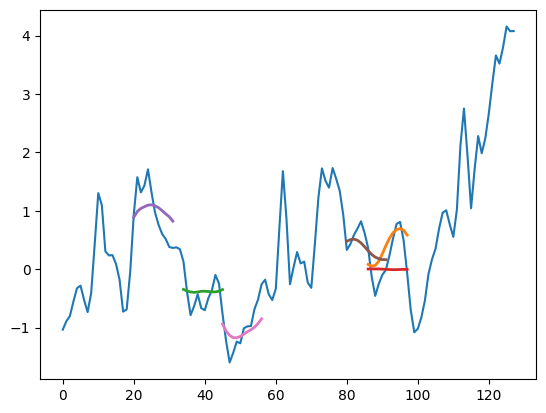

In [ ]:
ts_id = 3915
plt.figure()
n_shapelets = sum(shapelet_sizes.values())

plt.plot(body_gyro_x_train.T[ts_id])
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

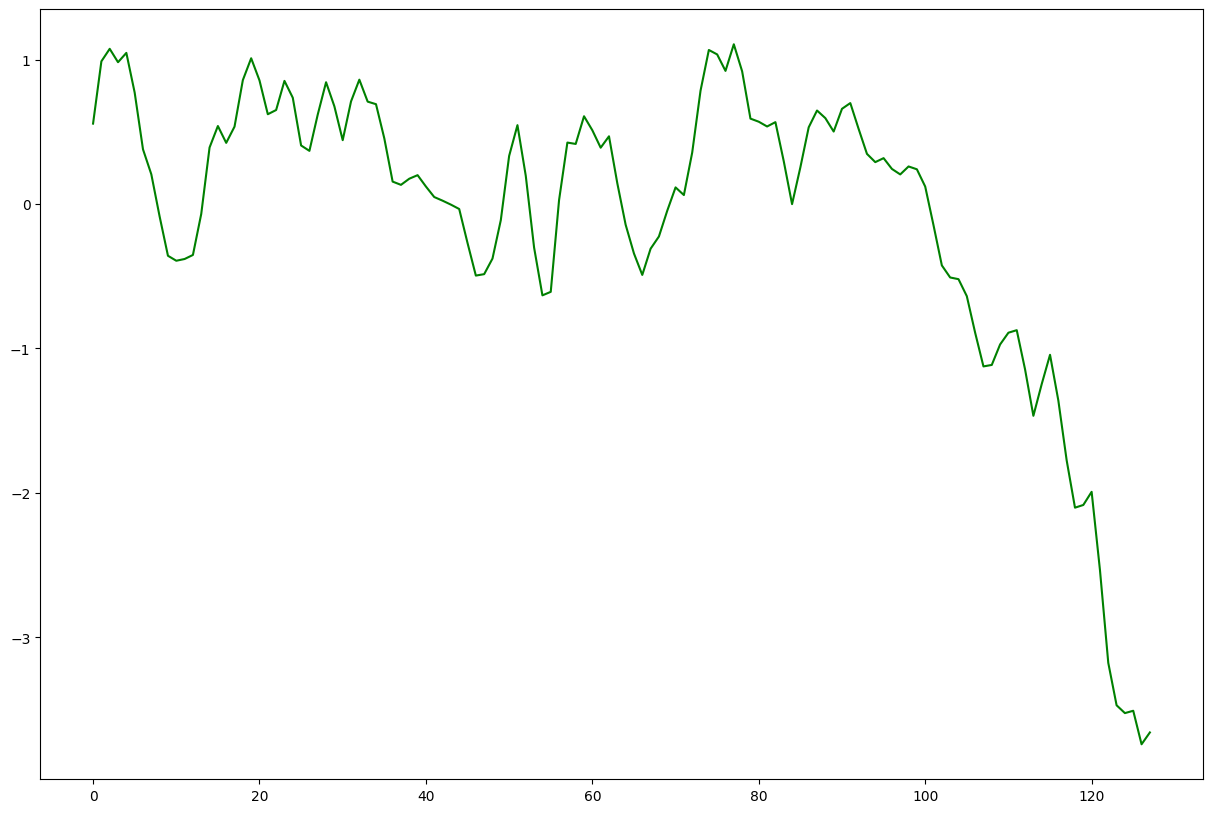

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[4871], color='green')
plt.show()

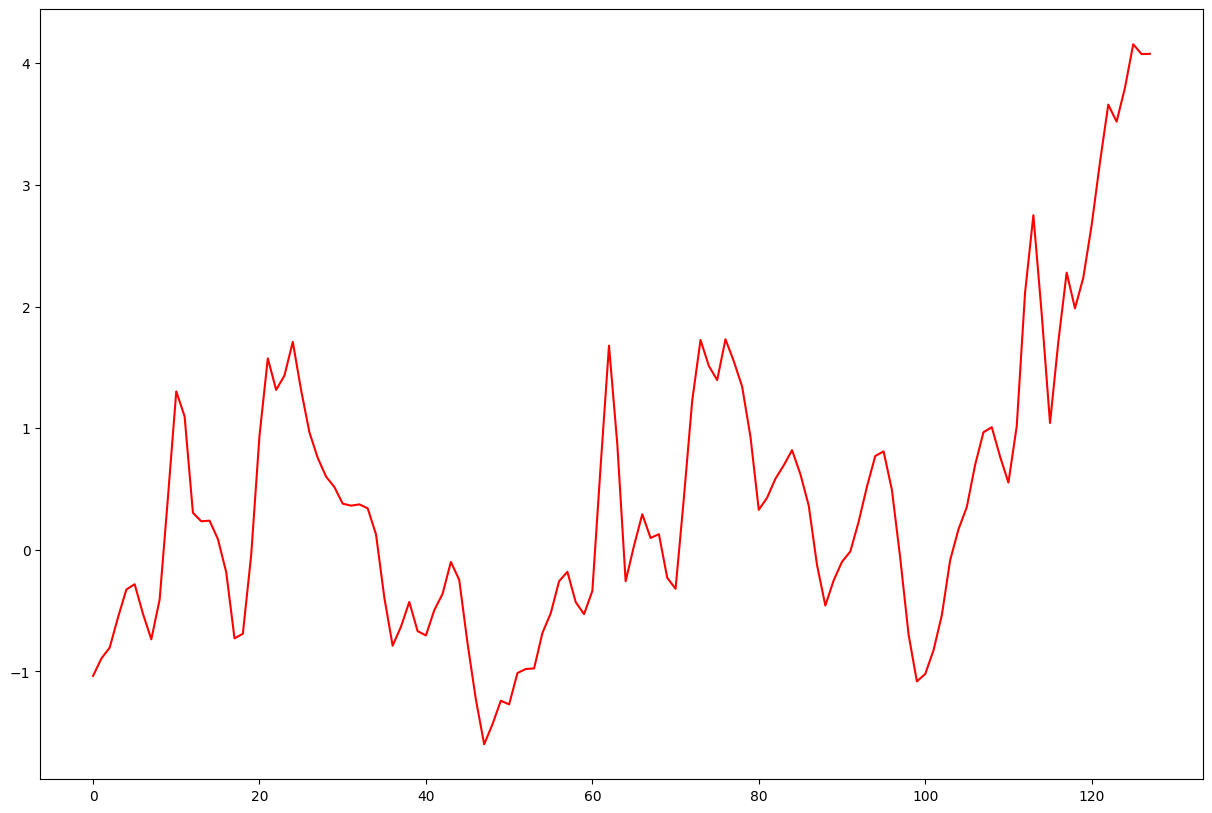

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3915], color='red')
plt.show()

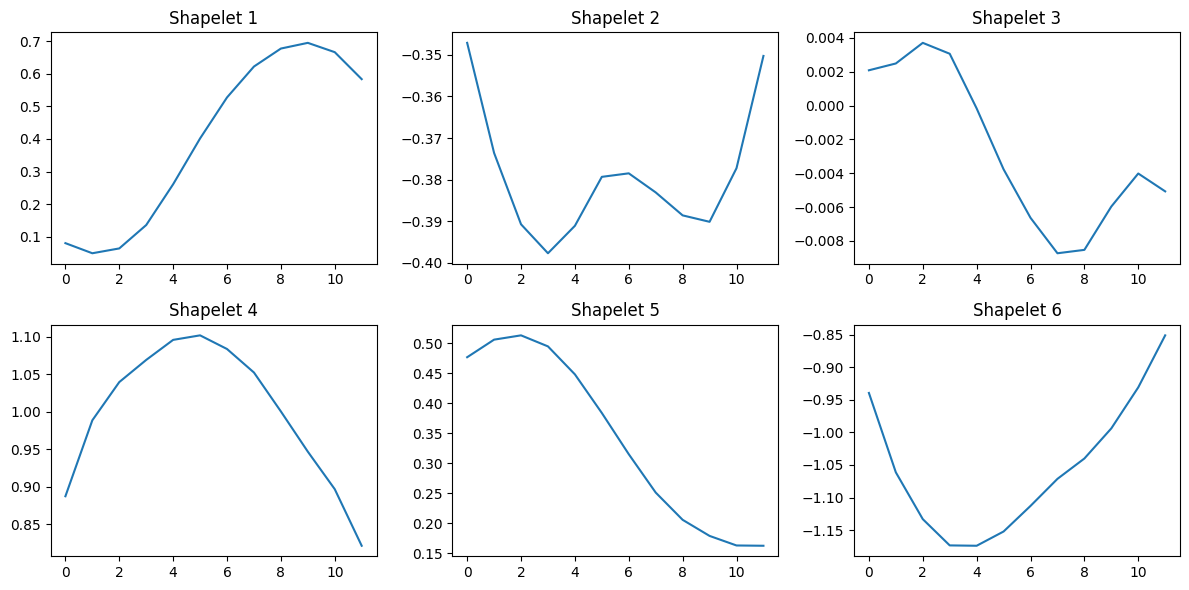

In [ ]:
import matplotlib.pyplot as plt

# shapelets è una lista di array che rappresentano le shapelet estratte
shapelets = shp_clf.shapelets_ # Inserisci qui i tuoi dati delle shapelet

# Creazione di un subplot per ogni shapelet
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Iterazione attraverso le shapelet e il subplot corrispondente
for i, shapelet in enumerate(shapelets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]

    # Tracciamento della shapelet come grafico a linee
    ax.plot(shapelet)

    # Aggiunta di etichette per il subplot
    ax.set_title(f"Shapelet {i+1}")

# Ottimizzazione dei layout e visualizzazione del grafico
plt.tight_layout()
plt.show()

In [ ]:
#w = 3
#mp, mpi = matrixProfile.stomp(ts.values, w)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train2 = shp_clf.transform(body_gyro_x_train) # we can also use the transform function that basically calculate the distance between the shapoelets found and a dataset of TS
X_test2 = shp_clf.transform(body_gyro_x_test)
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(body_gyro_x_train, y_train)
y_pred = clf.predict(body_gyro_x_test)
print(classification_report(y_test, y_pred))

12/12 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           1       0.89      0.72      0.80       496
           2       0.66      0.62      0.64       471
           3       0.93      0.46      0.62       420
           4       0.45      0.70      0.55       491
           5       0.50      0.51      0.50       532
           6       0.46      0.50      0.48       537

    accuracy                           0.59      2947
   macro avg       0.65      0.59      0.60      2947
weighted avg       0.64      0.59      0.59      2947



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train2 = shp_clf.transform(body_gyro_x_train) # we can also use the transform function that basically calculate the distance between the shapoelets found and a dataset of TS
X_test2 = shp_clf.transform(body_gyro_x_test)
clf = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
clf.fit(body_gyro_x_train, y_train)
y_pred = clf.predict(body_gyro_x_test)
print(classification_report(y_test, y_pred))

12/12 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           1       0.89      0.72      0.80       496
           2       0.66      0.62      0.64       471
           3       0.93      0.46      0.62       420
           4       0.45      0.70      0.55       491
           5       0.50      0.51      0.50       532
           6       0.46      0.50      0.48       537

    accuracy                           0.59      2947
   macro avg       0.65      0.59      0.60      2947
weighted avg       0.64      0.59      0.59      2947



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train2 = shp_clf.transform(body_gyro_x_train) # we can also use the transform function that basically calculate the distance between the shapoelets found and a dataset of TS
X_test2 = shp_clf.transform(body_gyro_x_test)
clf = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
clf.fit(body_gyro_x_train, y_train)
y_pred = clf.predict(body_gyro_x_test)
print(classification_report(y_test, y_pred))

12/12 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           1       0.91      0.76      0.82       496
           2       0.67      0.63      0.65       471
           3       0.91      0.46      0.61       420
           4       0.46      0.74      0.57       491
           5       0.53      0.50      0.51       532
           6       0.48      0.52      0.50       537

    accuracy                           0.60      2947
   macro avg       0.66      0.60      0.61      2947
weighted avg       0.65      0.60      0.61      2947



In [ ]:
#from tslearn.neighbors import KNeighborsTimeSeriesClassifier

# TODO: da runnare
#clf = KNeighborsTimeSeriesClassifier(metric='dtw')
#clf.fit(X_train2, y_train)
#y_pred = clf.predict(X_test2)
#print(classification_report(y_test, y_pred))

####CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [ ]:
def build_simple_cnn(n_timesteps, n_outputs): # this is a CNN for this task
    model = Sequential()

    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(GlobalAveragePooling1D())

    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
X_train_cnn = X_train2.reshape((X_train2.shape[0], X_train2.shape[1], 1))
X_test_cnn = X_test2.reshape((X_test2.shape[0], X_test2.shape[1], 1))



In [ ]:
X_train_cnn.shape

(7352, 6, 1)

In [ ]:
X_test_cnn=np.squeeze(X_test_cnn)

In [ ]:
X_train_cnn=np.squeeze(X_train_cnn)

In [ ]:
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  6
N. LABELS:  6


In [ ]:
import numpy as np

# Sottrai 1 dalle etichette per portarle nell'intervallo [0, 5]
y_train_cnn -= 1
y_val_cnn -= 1


In [ ]:
cnn = build_simple_cnn(n_timesteps, n_outputs)
cnn.summary()

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

In [ ]:

y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)
print(classification_report(y_test, y_pred))

### CANONICAL INTERVAL FOREST

In [ ]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 11.3 MB/s eta 0:00:00


In [ ]:
from sktime.classification.interval_based import CanonicalIntervalForest

clf = CanonicalIntervalForest(n_estimators=30)
clf.fit(X_train2, y_train)
y_pred = clf.predict(X_test2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.67      0.60       496
           2       0.51      0.54      0.52       471
           3       0.41      0.28      0.33       420
           4       0.50      0.56      0.53       491
           5       0.59      0.61      0.60       532
           6       0.46      0.40      0.43       537

    accuracy                           0.51      2947
   macro avg       0.50      0.51      0.50      2947
weighted avg       0.51      0.51      0.51      2947



LSTM

In [ ]:
from keras.layers import LSTM

In [ ]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(256, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
lstm = build_lstm(n_timesteps, n_outputs)

In [ ]:
lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 281,030
Trainable params: 281,030
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

# Sottrai 1 dalle etichette per portarle nell'intervallo [0, 5]
y_train_cnn -= 1
y_val_cnn -= 1


In [ ]:
lstm.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=50)

In [ ]:

history_lstm = lstm.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=50).history

In [ ]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
plt.plot(history_lstm['loss'], label='Loss')
plt.plot(history_lstm['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_lstm['accuracy'], label='Train')
plt.plot(history_lstm['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##TSC STATE OF THE ART


In [ ]:

from sktime.datatypes._panel._convert import from_3d_numpy_to_nested

In [ ]:

body_gyro_x_train = body_gyro_x_train.to_numpy()

In [ ]:
body_gyro_x_test = body_gyro_x_test.to_numpy()

In [ ]:
body_gyro_x_test.shape

(2947, 128)

In [ ]:
X_train_uni = from_3d_numpy_to_nested(body_gyro_x_train.reshape(7352,1,128))
X_test_uni = from_3d_numpy_to_nested(body_gyro_x_test.reshape(2947,1,128))

In [ ]:
X_test_uni.shape

(2947, 1)

In [ ]:
from tqdm import tqdm
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [ ]:
# PAA transform (and inverse transform) of the data
X_train_sax=[]
X_train_paa=[]

for ts in tqdm(body_gyro_x_train):

    n_paa_segments = 100
    paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
    ts_paa = paa.fit_transform(ts.reshape(1,-1))

    X_train_paa.append(ts_paa)

X_train_paa=np.array(X_train_paa)

for tt in tqdm(X_train_paa):
    # SAX transform
    n_sax_symbols = 64
    sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
    ts_sax = sax.fit_transform(tt)

    X_train_sax.append(ts_sax)

100%|██████████| 7352/7352 [00:12<00:00, 575.15it/s]


In [ ]:
X_train_sax=np.array(X_train_sax)
X_train_sax.shape

(7352, 1, 100, 1)

In [ ]:
# PAA transform (and inverse transform) of the data
X_test_sax=[]
X_test_paa=[]

for ts in tqdm(body_gyro_x_test):

    n_paa_segments = 100
    paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
    ts_paa = paa.fit_transform(ts.reshape(1,-1))

    X_test_paa.append(ts_paa)

X_test_paa=np.array(X_test_paa)

for tt in tqdm(X_test_paa):
    # SAX transform
    n_sax_symbols = 64
    sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
    ts_sax = sax.fit_transform(tt)

    X_test_sax.append(ts_sax)

100%|██████████| 2947/2947 [00:05<00:00, 511.11it/s]


In [ ]:
X_test_sax=np.array(X_test_sax)

In [ ]:
X_train_uni = from_3d_numpy_to_nested(X_train_sax.reshape(7352,1,100))
X_test_uni = from_3d_numpy_to_nested(X_test_sax.reshape(2947,1,100))

In [ ]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [ ]:
%%time
clf = KNeighborsTimeSeriesClassifier()
clf.fit(X_train_uni, y_train)

CPU times: user 3.66 s, sys: 55.2 ms, total: 3.72 s
Wall time: 3.73 s


KNeighborsTimeSeriesClassifier()

In [ ]:
%%time
y_pred = clf.predict(X_test_uni)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.82      0.79       496
           2       0.67      0.71      0.69       471
           3       0.71      0.58      0.64       420
           4       0.45      0.39      0.42       491
           5       0.44      0.61      0.51       532
           6       0.44      0.33      0.38       537

    accuracy                           0.57      2947
   macro avg       0.58      0.57      0.57      2947
weighted avg       0.57      0.57      0.56      2947

CPU times: user 21min 31s, sys: 2.75 s, total: 21min 34s
Wall time: 21min 42s


In [ ]:
y_train.shape

(7352,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train_uni, y_train)
y_pred = clf.predict(X_test_uni)
print(classification_report(y_test, y_pred))

ValueError: ignored

In [ ]:
clf=RandomForestClassifier(n_estimators=500,
                           criterion="gini",
                           max_depth=None,
                           min_samples_leaf=1,
                           min_samples_split= 2 ,
                           max_features="auto",
                           random_state=0,
                           n_jobs=-1)
clf.fit(X_train_uni, y_train)
y_pred=clf.predict(X_test_uni)

print("Accuracy %s",  accuracy_score(y_test, y_pred))
print("F1-score %s",  f1_score(y_test, y_pred,average=None))
print(classification_report(y_test, y_pred, target_names=activities.values()))

ValueError: ignored

###ROCKET

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket

In [ ]:

%%time
rocket = Rocket()  # by default, MiniRocket uses ~10,000 kernels
rocket.fit(X_train_uni)
X_train_transform = rocket.transform(X_train_uni)
clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
clf.fit(X_train_transform, y_train)

CPU times: user 4min 27s, sys: 12.6 s, total: 4min 40s
Wall time: 3min 38s


RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))

In [ ]:
X_test_transform = rocket.transform(X_test_uni)
y_pred = clf.predict(X_test_transform)
print(classification_report(y_test, y_pred))

TypeError: ignored

###MINIROCKET


In [ ]:

from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocket

In [ ]:
%%time
minirocket = MiniRocket()  # by default, MiniRocket uses ~10,000 kernels
minirocket.fit(X_train_uni)
X_train_transform = minirocket.transform(X_train_uni)

CPU times: user 21.4 s, sys: 299 ms, total: 21.7 s
Wall time: 58.3 s


In [ ]:
clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
clf.fit(X_train_transform.to_numpy(), y_train.ravel())

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))

In [ ]:
X_test_transform = minirocket.transform(X_test_uni)

In [ ]:
%%time
y_pred = clf.predict(X_test_transform.to_numpy())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.78      0.82       496
           2       0.68      0.80      0.73       471
           3       0.74      0.69      0.72       420
           4       0.56      0.53      0.55       491
           5       0.66      0.74      0.70       532
           6       0.62      0.58      0.60       537

    accuracy                           0.68      2947
   macro avg       0.69      0.69      0.69      2947
weighted avg       0.69      0.68      0.68      2947

CPU times: user 238 ms, sys: 29 ms, total: 267 ms
Wall time: 206 ms


##MOTIF

In [ ]:
X_1st =body_gyro_x_train.T[3780]
X_2st = body_gyro_x_train.T[3914]



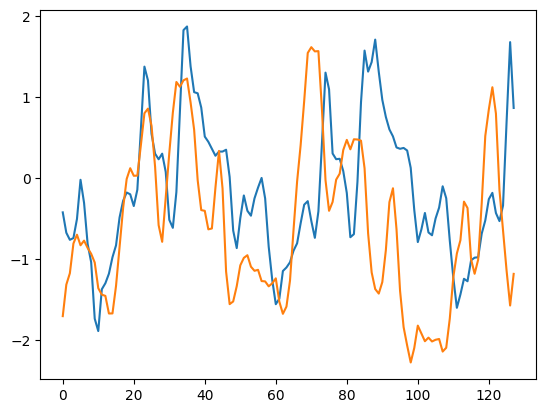

In [ ]:
plt.plot(X_2st)
plt.plot(X_1st)
plt.show()

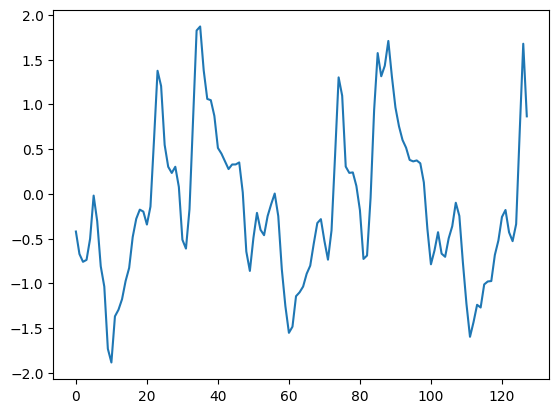

In [ ]:
plt.plot(X_2st)
plt.show()

In [ ]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 2.9 MB/s eta 0:00:00


In [ ]:
import stumpy

1* CAMPIONE

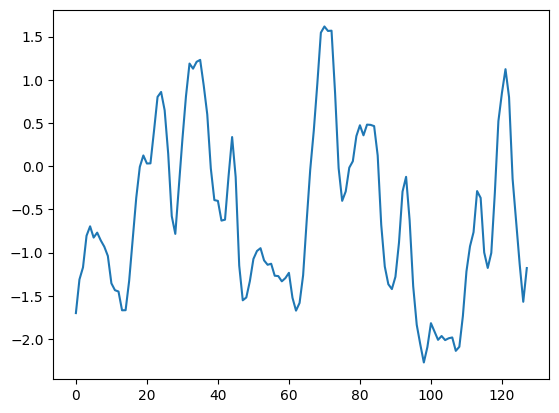

In [ ]:
plt.plot(X_1st)
plt.show()

In [ ]:
X_1st.shape

(128,)

In [ ]:
!pip install matrixprofile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.6/331.6 kB 4.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install mass_ts

In [ ]:
!pip install matrixprofile-ts

In [ ]:
from matrixprofile import *
import matrixprofile as mpx

In [ ]:
X_1st=np.array(X_1st)

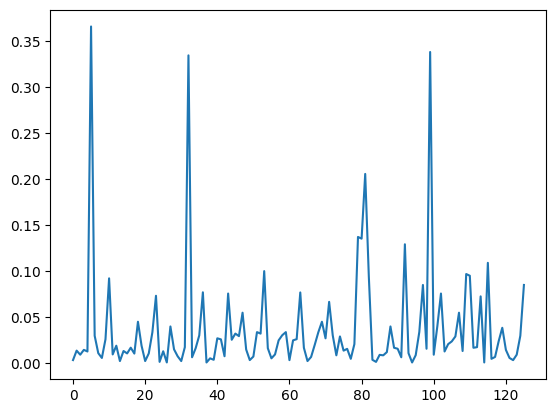

In [ ]:
w = 3
mp, mpi = matrixProfile.stomp(X_1st, w)

plt.plot(mp)
plt.show()

In [ ]:
print(mpi)


[ 49.  75.  91. 120. 103.   3. 124.  93. 121.  87.  87.  56.  19.  20.
 108.  21.  65.   0.  69.  12.  13.  15.  68.  51.  84.   7. 114.  88.
  15.  42.  65. 112.  80.  91.  54.  72.  44.  94.  55.  83.  70.  20.
  29. 102.  84.  52.  70. 107.  14.   0.   0.  59.  45.  74.  34.  38.
  11.  61.  98.  51. 122.  57.  77.  58.  29.  30. 117.  21.  22.  18.
  40.  39.  35.  86. 106.   1.  33. 116. 104.  43. 115.  68. 113.  39.
  24.  37.  73. 114.  27. 111.  98.  33.  23.   7.  37.  60. 124. 125.
  90. 112. 123.   4.  43.   4.  78.  34.  74.  47.  14. 104. 104.  89.
  31.  11.  26. 125.  77.  66.  17.  42.   3.   8.  60. 100.   6.  97.]


In [ ]:
mo, mod  = motifs.motifs(X_1st, (mp, mpi), max_motifs=4)

In [ ]:
mo

[[37, 94], [26, 114], [30, 65]]

In [ ]:
mod

[0.0003650894978369498, 0.0003928157914942221, 0.0019026440335253424]

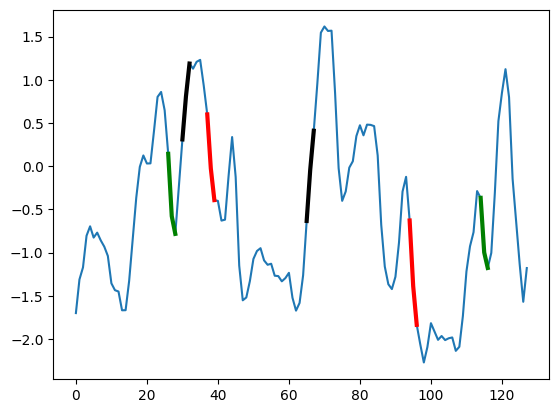

In [ ]:
plt.plot(X_1st)
colors = ['r', 'g', 'k', 'b'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = X_1st[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [ ]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = X_1st[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

DISCORD

In [ ]:
from matrixprofile.discords import discords

In [ ]:
anoms = discords(mp, ex_zone=20, k=5)

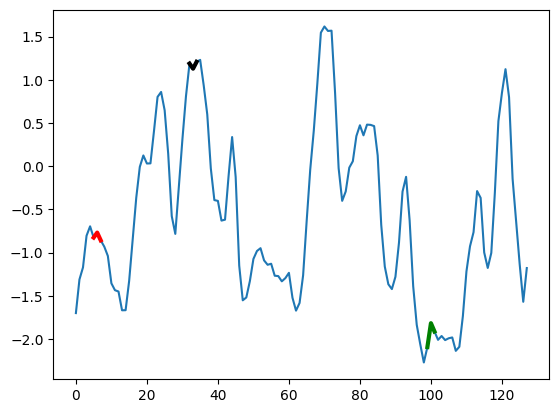

In [ ]:
plt.plot(X_1st)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = X_1st[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

####2* CAMPIONE

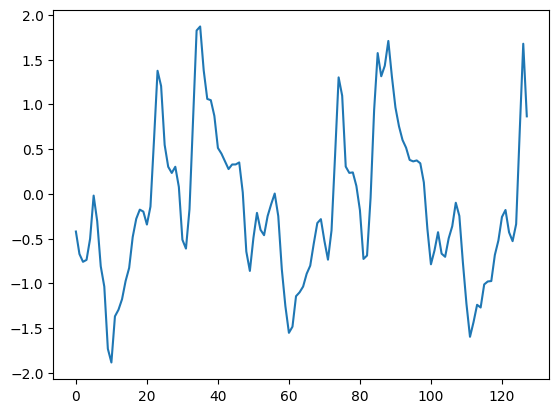

In [ ]:
plt.plot(X_2st)
plt.show()

In [ ]:
X_2st.shape

(128,)

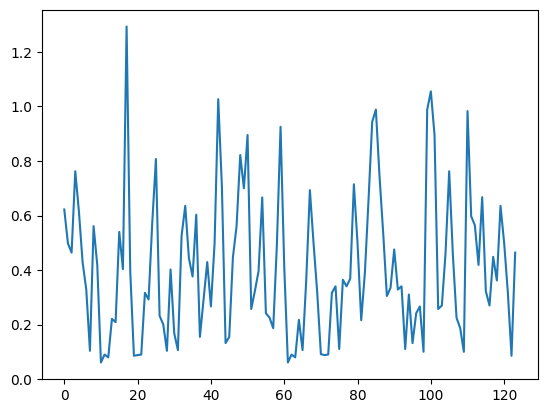

In [ ]:
w = 5
mp, mpi = matrixProfile.stomp(X_2st, w)

plt.plot(mp)
plt.show()

In [ ]:
mo, mod  = motifs.motifs(X_2st, (mp, mpi), max_motifs=4)

In [ ]:
mo

[[10, 61], [19, 70, 122], [98, 109]]

In [ ]:
mod

[0.06140438999630106, 0.08592293943686949, 0.1005494010132314]

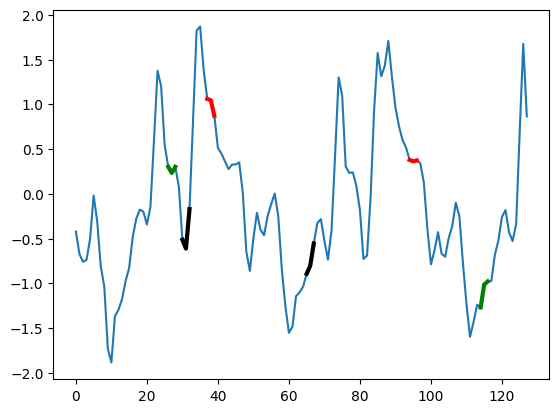

In [ ]:
plt.plot(X_2st)
colors = ['r', 'g', 'k', 'b'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = X_2st[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

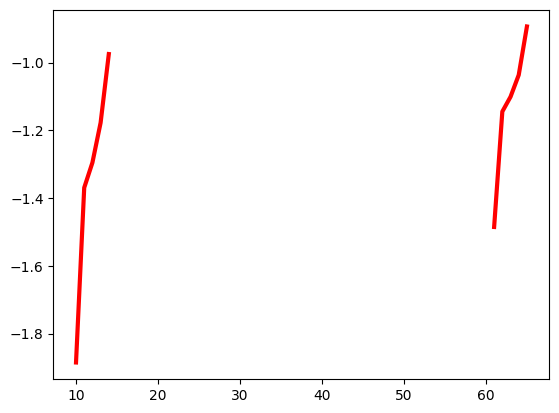

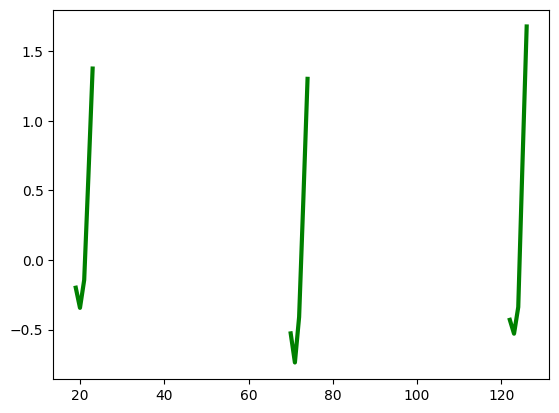

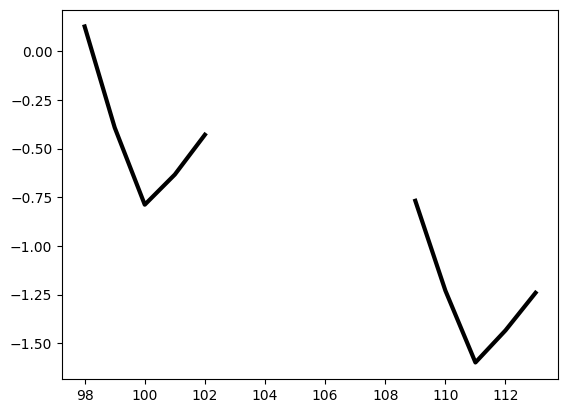

In [ ]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = X_2st[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

DISCORD

In [ ]:
anoms = discords(mp, ex_zone=20, k=4)

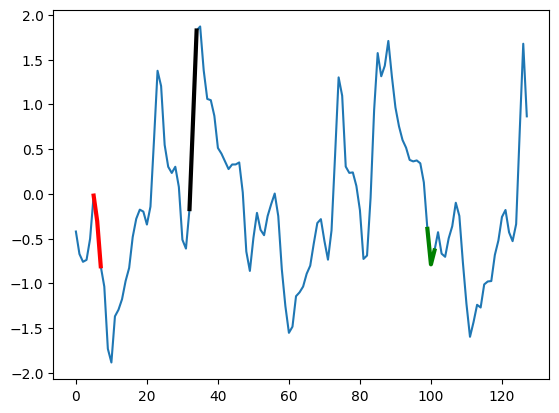

In [ ]:
plt.plot(X_2st)
colors = ['r', 'g', 'k', 'b'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = X_2st[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()